In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import glob
from PIL import Image
import os
from os import listdir
import matplotlib.pyplot as plt
import time
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np
from os import listdir
% matplotlib inline
import keras
from keras import backend as K
from keras.preprocessing import text
import random

% matplotlib inline

In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default() 
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 155013 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.26-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [ ]:
!mkdir -p drive
!google-drive-ocamlfuse drive

/usr/bin/xdg-open: 851: /usr/bin/xdg-open: www-browser: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links2: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: elinks: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: lynx: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force'
/bin/sh: 1: firefox: not found
/bin/sh: 1: google-chrome: not found
/bin/sh: 1: chromium-browser: not found
/bin/sh: 1: open: not found
Error: Error opening URL:https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Images/Images')

In [ ]:
!ls

 A10.jpg		    Features.jpg       logs		   saved_models
 A11.jpg		    H10.jpg	       Normalimages	   V10.jpg
 A12.jpg		    H11.jpg	       Outlined.jpg	   V11.jpg
 A13.jpg		    H12.jpg	       Outline_Image.png   V12.jpg
 A14.jpg		    H13.jpg	       S10.jpg		   V13.jpg
 A15.jpg		    H14.jpg	      'S1 (1).jpg'	   V14.jpg
 A16.jpg		    H15.jpg	       S11.png		   V15.jpg
 A1.jpg			    H16.jpg	       S12.jpg		   V16.jpg
'A2 (1).jpg'		    H17.jpg	       S1.jpg		   V1.jpg
 A2.jpg			    H1.jpg	      'S2 (1).jpg'	   V2.jpg
 A3.jpg			    H2.jpg	       S2.jpg		   V3.jpg
 A4.jpg			    H3.jpg	       S3.jpg		   V4.jpg
 A5.jpg			    H4.jpg	       S4.jpg		   V5.jpg
 A6.jpg			    H5.jpg	       S5.jpg		   V6.jpg
 A7.jpg			    H6.jpg	       S6.jpg		   V7.jpg
 A8.jpg			    H7.jpg	       S7.jpg		   V8.jpg
 A9.jpg			    H8.jpg	       S8.jpg		   V9.jpg
 contours_none_image1.jpg   H9.jpg	       S9.jpg
 Extracted.jpg		    image_thres1.jpg   saved_images


In [ ]:
!pip3 install SimpleITK

     |████████████████████████████████| 48.4 MB 5.2 kB/s 


In [ ]:
import glob
import matplotlib.pyplot as plt
import SimpleITK as sitk
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from PIL import Image 

img_dir="/content/drive/MyDrive/Images/Images"
data_path=os.path.join(img_dir,'*g')
files=glob.glob(data_path)
data=[]
for f1 in files:
   im = Image.open(f1) 
   im.show(f1) 
   print(f1)

/content/drive/MyDrive/Images/Images/V1.jpg
/content/drive/MyDrive/Images/Images/V2.jpg
/content/drive/MyDrive/Images/Images/V3.jpg
/content/drive/MyDrive/Images/Images/V4.jpg
/content/drive/MyDrive/Images/Images/V5.jpg
/content/drive/MyDrive/Images/Images/V7.jpg
/content/drive/MyDrive/Images/Images/V8.jpg
/content/drive/MyDrive/Images/Images/V9.jpg
/content/drive/MyDrive/Images/Images/V10.jpg
/content/drive/MyDrive/Images/Images/V11.jpg
/content/drive/MyDrive/Images/Images/V13.jpg
/content/drive/MyDrive/Images/Images/V14.jpg
/content/drive/MyDrive/Images/Images/V15.jpg
/content/drive/MyDrive/Images/Images/V16.jpg
/content/drive/MyDrive/Images/Images/V6.jpg
/content/drive/MyDrive/Images/Images/V12.jpg
/content/drive/MyDrive/Images/Images/A3.jpg
/content/drive/MyDrive/Images/Images/A4.jpg
/content/drive/MyDrive/Images/Images/A5.jpg
/content/drive/MyDrive/Images/Images/A6.jpg
/content/drive/MyDrive/Images/Images/A7.jpg
/content/drive/MyDrive/Images/Images/A8.jpg
/content/drive/MyDrive/Im

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving V6.jpg to V6 (1).jpg


In [ ]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

In [ ]:
from google.colab.patches import cv2_imshow

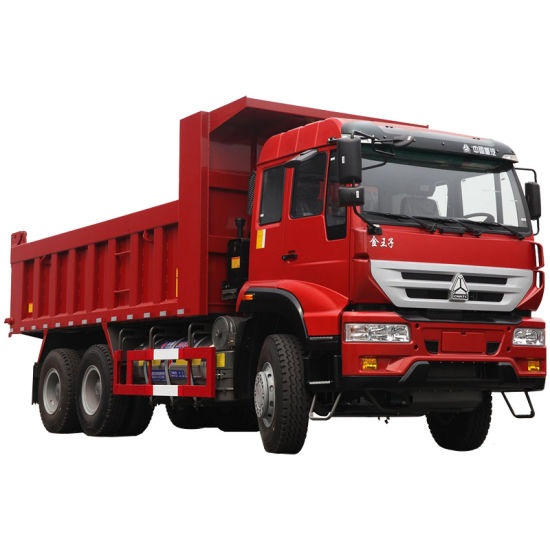

In [ ]:

img = cv2.imread('/content/drive/MyDrive/Images/Images/V6.jpg')
cv2_imshow(img)

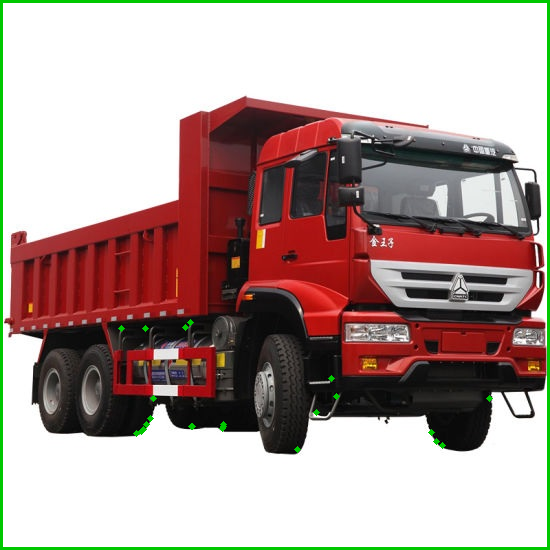

In [ ]:
import cv2

img = cv2.imread('/content/drive/MyDrive/Images/Images/V6.jpg')
start_time = time.time()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

contours = cv2.findContours(gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
cv2.drawContours(img, contours, -1, (0, 200, 0), 3)

cv2_imshow(img)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = (10, 8)


In [ ]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    
def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')

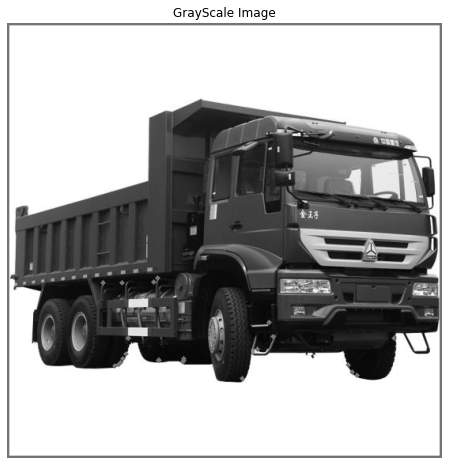

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(8,8))
plt.imshow(gray,cmap="gray")
plt.axis('off')
plt.title("GrayScale Image")
plt.show()

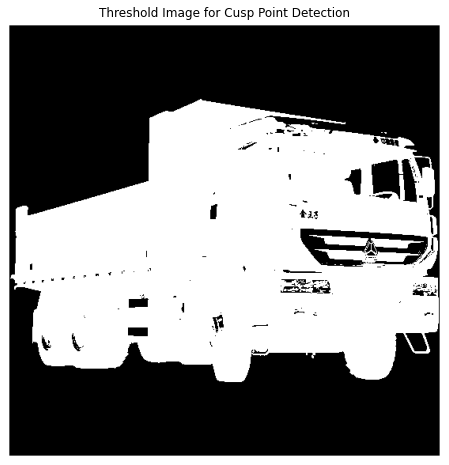

In [ ]:
ret, thresh = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY_INV +cv2.THRESH_OTSU)
plt.figure(figsize=(8,8))
plt.imshow(thresh,cmap="gray")
plt.axis('off')
plt.title("Threshold Image for Cusp Point Detection")
plt.show()

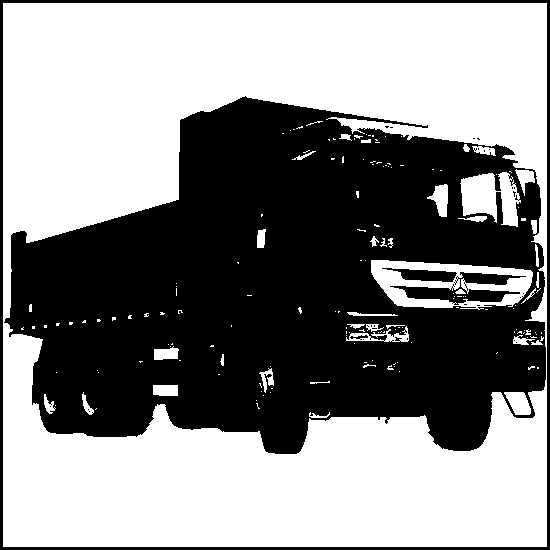

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)

# visualize the binary image

cv2_imshow(thresh)

cv2.waitKey(0)

cv2.imwrite('/content/drive/MyDrive/Images/Images/V6.jpg', thresh)

cv2.destroyAllWindows()

In [ ]:
from PIL import Image

img = Image.open('/content/drive/MyDrive/Images/Images/V6.jpg')
imgWidth, imgHeight = img.size
img = img.convert("RGBA")
imgdata = img.getdata()

x_pos = 0
y_pos = 1

pixel_value = []
x = []
y = []

for item in imgdata:
    if (x_pos) == imgWidth:
        x_pos = 1
        y_pos += 1
    else:
        x_pos += 1

    if item[3] != 0:
        pixel_value.append(item[2])
        x.append(x_pos)
        y.append(y_pos)

pixel_value, x, y = zip(*sorted(zip(pixel_value, x, y), reverse=True))

print(f'{pixel_value}\n{x}\n{y}')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



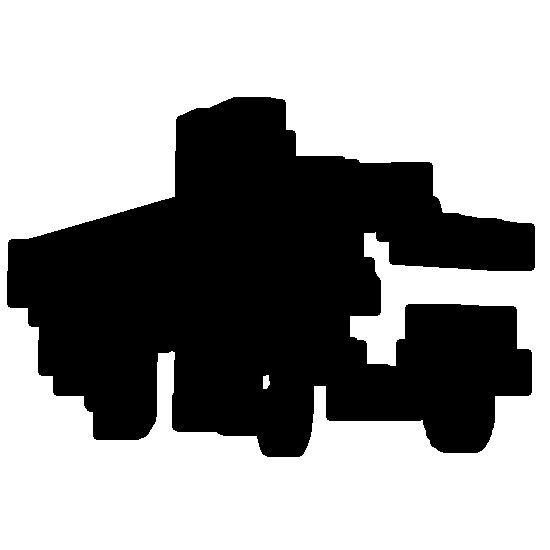

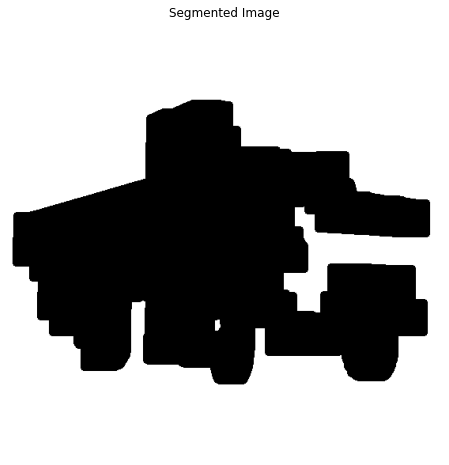

In [ ]:
import math
kernel = np.ones((3, 3), np.uint8)
th=0
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE,kernel, iterations = 15)
bg = cv2.dilate(closing, kernel, iterations = 1)
dist_transform = cv2.distanceTransform(closing, cv2.DIST_L2, 0)
ret, fg = cv2.threshold(dist_transform, 0.02*dist_transform.max(), 255, 0)
seg= ret+ math.sqrt(int(max(pixel_value))+int(x_pos)+int(y_pos))
cv2_imshow(fg)
plt.figure(figsize=(8,8))
plt.imshow(fg,cmap="gray")
plt.axis('off')
plt.title("Segmented Image")
plt.show()

left: (0, 0)
right: (549, 549)
top: (0, 0)
bottom: (0, 549)


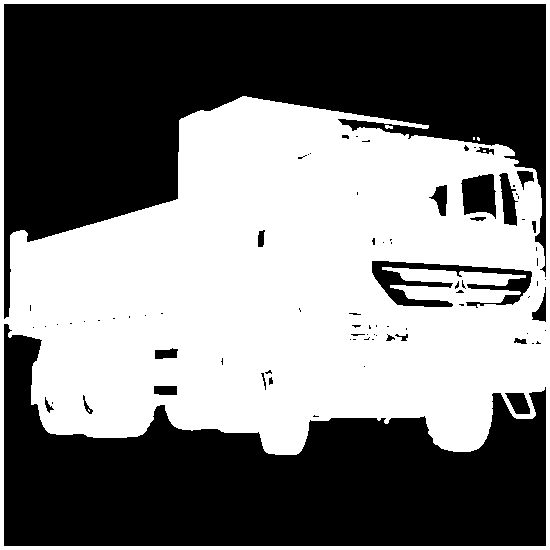

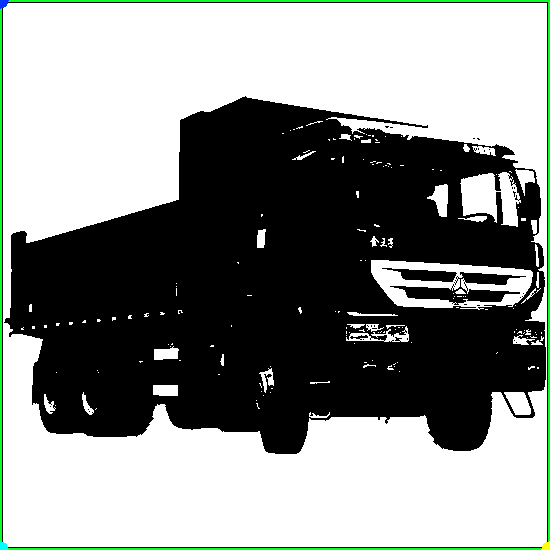

-1

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Images/Images/V6.jpg')
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
thresh = cv2.threshold(blur, 220, 255, cv2.THRESH_BINARY_INV)[1]

# Find contours
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
c = max(cnts, key=cv2.contourArea)

# Obtain outer coordinates
left = tuple(c[c[:, :, 0].argmin()][0])
right = tuple(c[c[:, :, 0].argmax()][0])
top = tuple(c[c[:, :, 1].argmin()][0])
bottom = tuple(c[c[:, :, 1].argmax()][0])

# Draw dots onto image
cv2.drawContours(image, [c], -1, (36, 255, 12), 2)
cv2.circle(image, left, 8, (0, 50, 255), -1)
cv2.circle(image, right, 8, (0, 255, 255), -1)
cv2.circle(image, top, 8, (255, 50, 0), -1)
cv2.circle(image, bottom, 8, (255, 255, 0), -1)

print('left: {}'.format(left))
print('right: {}'.format(right))
print('top: {}'.format(top))
print('bottom: {}'.format(bottom))
cv2_imshow(thresh)
cv2_imshow(image)
cv2.waitKey()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import cv2
from matplotlib import pyplot as plt

colsums = np.sum(gray, axis=0)

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [ ]:
im_gray = cv2.imread('/content/drive/MyDrive/Images/Images/V6.jpg',  cv2.IMREAD_GRAYSCALE)
image = cv2.GaussianBlur(im_gray, (5,5), 1)
th =  cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,3,2)

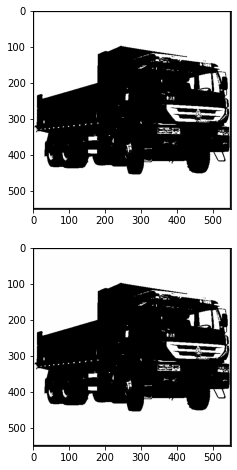

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Images/Images/V6.jpg')
b,g,r = cv2.split(img)       
rgb_img = cv2.merge([r,g,b])    


dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)

b,g,r = cv2.split(dst)          
rgb_dst = cv2.merge([r,g,b])    

plt.subplot(211),plt.imshow(rgb_img)
plt.subplot(212),plt.imshow(rgb_dst)
plt.show()

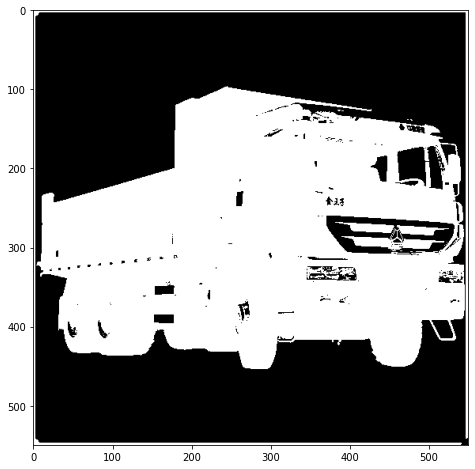

In [ ]:
# create a binary thresholded image
_, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)
# show it
plt.imshow(binary, cmap="gray")
plt.show()

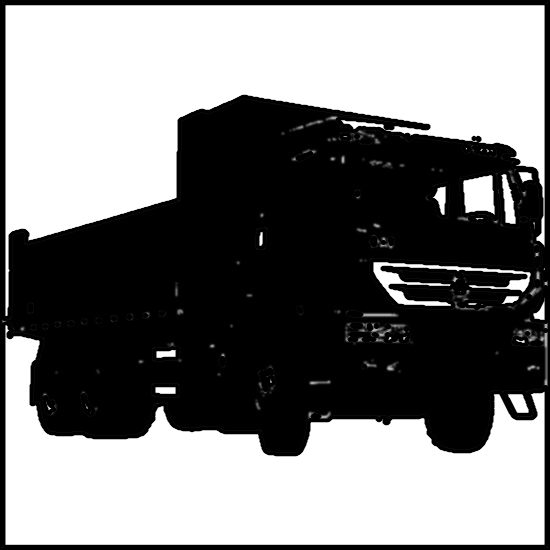

In [ ]:
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

                                      

# draw contours on the original image

image_copy = image.copy()

cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

                

# see the results

cv2_imshow(image_copy)

cv2.waitKey(0)

cv2.imwrite('contours_none_image1.jpg', image_copy)

cv2.destroyAllWindows()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving V6.jpg to V6 (2).jpg


In [ ]:
# import the necessary packages
import imutils
import cv2
# load the image, convert it to grayscale, and blur it slightly
image = cv2.imread('/content/drive/MyDrive/Images/Images/V6.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
# threshold the image, then perform a series of erosions +
# dilations to remove any small regions of noise
thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)
# find contours in thresholded image, then grab the largest
# one
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)

In [ ]:
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

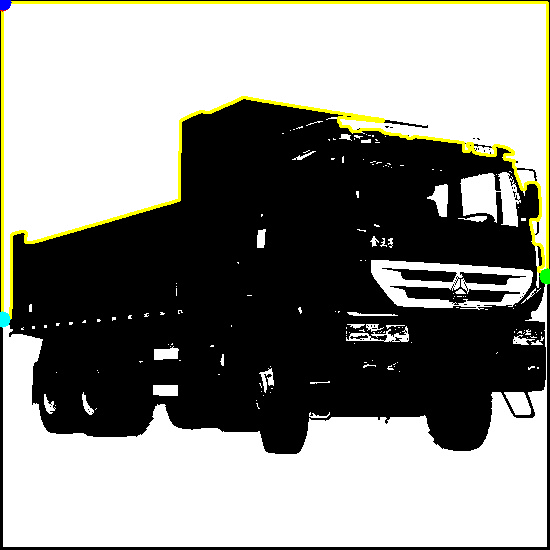

In [ ]:
cv2.drawContours(image, [c], -1, (0, 255, 255), 2)
cv2.circle(image, extLeft, 8, (0, 0, 255), -1)
cv2.circle(image, extRight, 8, (0, 255, 0), -1)
cv2.circle(image, extTop, 8, (255, 0, 0), -1)
cv2.circle(image, extBot, 8, (255, 255, 0), -1)
# show the output image
cv2_imshow(image)


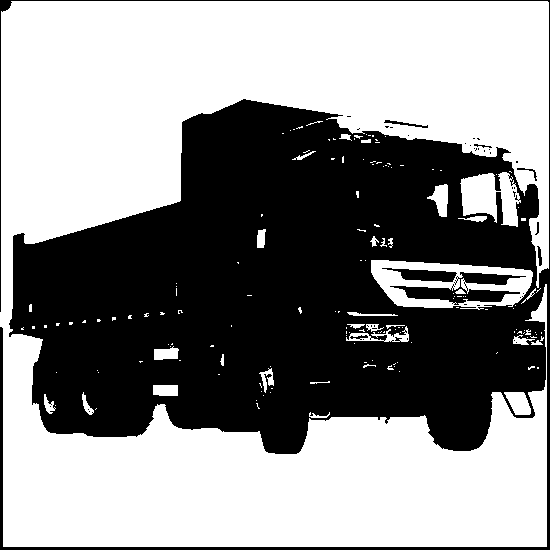

In [ ]:
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)

# visualize the binary image

cv2_imshow(thresh)

cv2.waitKey(0)

cv2.imwrite('image_thres1.jpg', thresh)

cv2.destroyAllWindows()



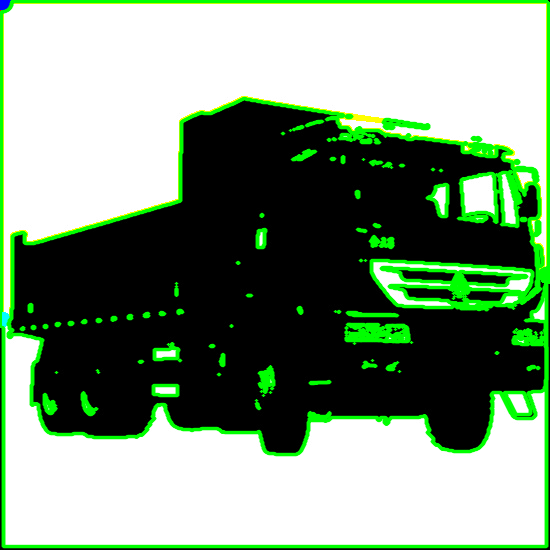

In [ ]:
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

                                      

# draw contours on the original image

image_copy = image.copy()

cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

                

# see the results

cv2_imshow(image_copy)

cv2.waitKey(0)

cv2.imwrite('contours_none_image1.jpg', image_copy)

cv2.destroyAllWindows()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
def drawhoughLinesOnImage(image, houghLines):
    for line in houghLines:
        for rho,theta in line:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
            
            cv2.line(image,(x1,y1),(x2,y2),(0,255,0), 2)   

def draw_circles(img, circles):
  for co, i in enumerate(circles[0, :], start=1):
    cv2.circle(img, (i[0],i[1]), i[2], (255, 0,255), 3)

# Different weights are added to the image to give a feeling of blending
def blend_images(image, final_image, alpha=0.7, beta=1., gamma=0.):
    return cv2.addWeighted(final_image, alpha, image, beta,gamma)

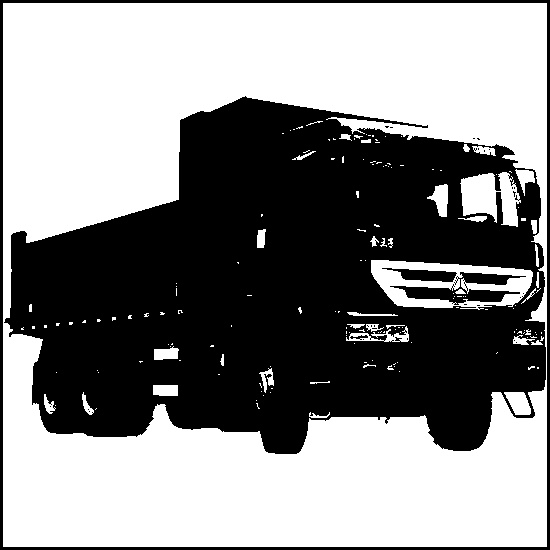

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Images/Images/V6.jpg")
cv2_imshow(img)

In [ ]:
img_contour = img.copy()

img_blur = cv2.GaussianBlur(img, (7, 7), 1)
img_gray = cv2.cvtColor(img_blur, cv2.COLOR_BGR2GRAY)

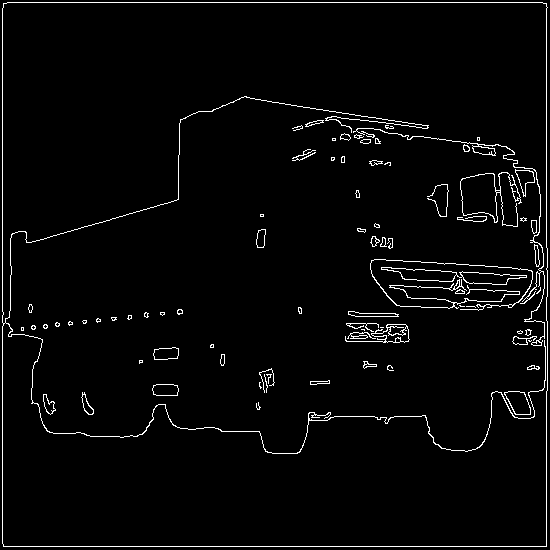

In [ ]:
img_canny = cv2.Canny(img_gray, 200, 400)
cv2_imshow(img_canny)

In [ ]:
kernel = np.ones((3))
img_dilated = cv2.dilate(img_canny, kernel, iterations=1)

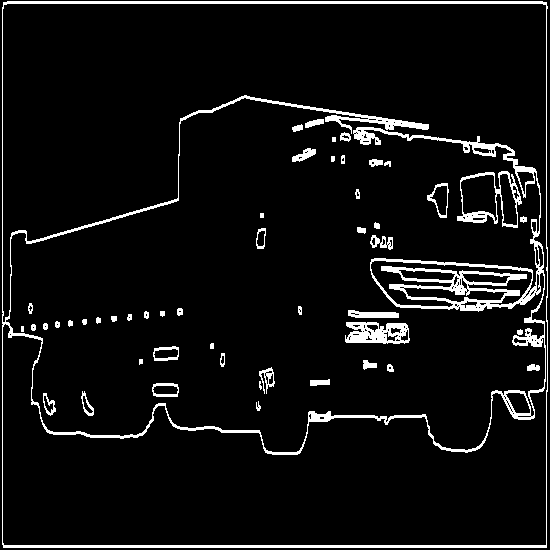

In [ ]:
cv2_imshow(img_dilated)

In [ ]:
def get_contours(img, img_contour):
  contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

  for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 9000:
      cv2.drawContours(img_contour, cnt, -1, (255, 0, 255), 1)

      # Find length of contours
      param = cv2.arcLength(cnt, True)

      # Approximate what type of shape this is
      approx = cv2.approxPolyDP(cnt, 0.01 * param, True)
      shape, x, y, w, h = find_shape(approx)
      cv2.putText(img_contour, shape, (x+78, y+200), cv2.FONT_HERSHEY_COMPLEX, .7, (255, 0, 255), 1)

  return approx, param, img_contour, contours, cnt

In [ ]:
img_contour = img.copy()

img_blur = cv2.GaussianBlur(img, (7, 7), 1)
img_gray = cv2.cvtColor(img_blur, cv2.COLOR_BGR2GRAY)

img_canny = cv2.Canny(img_gray, 50, 190)

kernel = np.ones((2))
img_dilated = cv2.dilate(img_canny, kernel, iterations=1)

In [ ]:
def get_contours(img, img_contour):
  contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

  cnt = contours[0]
  print("Contour: ")
  print(cnt)
  cv2.drawContours(img_contour, cnt, -1, (255, 0, 255), 2)

In [ ]:
black = np.zeros((img.shape[0], img.shape[1]))
get_contours(img_dilated, black)

Contour: 
[[[  7   2]]

 [[  6   3]]

 [[  3   3]]

 [[  3   7]]

 [[  2   8]]

 [[  2 312]]

 [[  3 313]]

 [[  3 314]]

 [[  2 315]]

 [[  2 323]]

 [[  3 324]]

 [[  3 325]]

 [[  2 326]]

 [[  2 544]]

 [[  3 545]]

 [[  3 547]]

 [[546 547]]

 [[546 392]]

 [[547 391]]

 [[547 321]]

 [[546 320]]

 [[546 298]]

 [[547 297]]

 [[547 270]]

 [[546 269]]

 [[547 268]]

 [[547 248]]

 [[546 247]]

 [[546   9]]

 [[547   8]]

 [[547   7]]

 [[546   6]]

 [[546   3]]

 [[543   3]]

 [[542   2]]]


In [ ]:
def find_shape(approx):
  x, y, w, h = cv2.boundingRect(approx)
  if len(approx) == 3:
    s = "Triangle"
  
  elif len(approx) == 4:
    calculation = w / float(h)
    if calculation >= 0.95:
      s = "Square"
    else:
      s = "Rectangle"
    
  elif len(approx) == 5:
    s = "Pentagon"
  
  elif len(approx) == 8:
    s = "Octagon"
  
  else:
    s = "Circle"
  
  return s, x, y, w, h

In [ ]:
from PIL import Image
import math


def one_to_two_dimension_array(list_,columns):
    #use list slice
    return [ list_[i:i+columns] for i in range(0, len(list_),columns) ] 

def flatten_matrix(matrix):
    return [val for sublist in matrix for val in sublist]

def matrix_convole(matrix, kernel_matrix, multiplier):
    return_list=[]
    return_matrix=[]

    border=(len(kernel_matrix) - 1) / 2;border=int(border)
    center_kernel_pos=border
    for matrix_row in range( len( matrix )):
        for matrix_col in range(len( matrix[matrix_row] ) ):
            accumulator = 0
            if (matrix_row - border)<0 or \
            (matrix_col-border)< 0 or \
            (matrix_row+border) > (len( matrix )-border) or \
            (matrix_col+border) > (len( matrix[matrix_row] )-border):
                return_list.append(matrix[matrix_row][matrix_col])
                continue
            for kernel_row in range(len (kernel_matrix) ):
                for kernel_col in range(len (kernel_matrix[kernel_row]) ):      

                    relative_row= kernel_row - center_kernel_pos
                    relative_col= kernel_col - center_kernel_pos
                    kernel = kernel_matrix[kernel_row][kernel_col]
                    pixel = matrix [matrix_row + relative_row] [matrix_col + relative_col]
                    accumulator += pixel * kernel
            return_list.append(accumulator* multiplier )
    return_matrix = one_to_two_dimension_array( return_list, len( matrix[0] ) )
    return return_matrix
            
def canny_round_degree(deg):
    #0, 22.5, 45, 67.5, 90, 112.5, 135, 157.5, 180

    if deg >= 0 and deg <= 22.5:
        return 0
    elif deg >= 22.5 and deg <= 67.5:
        return 45
    elif deg > 67.5 and deg <=112.5:
        return 90
    elif deg > 112.5 and deg <=157.5:
        return 135
    elif deg >= 157.5 and deg <= 180:
        return 0

    if deg <= 0 and deg >= -22.5:
        return 0
    elif deg <= -22.5 and deg >= -67.5:
        return 135
    elif deg < -67.5 and deg >= -112.5:
        return 90
    elif deg < -112.5 and deg >= -157.5:
        return 45
    elif deg <= -157.5 and deg >= -180:
        return 0



In [ ]:
image_path='/content/drive/MyDrive/Images/Images/V6.jpg'
gaussian_5x5_kernel=[[2,4,5,4,2],[4,9,12,9,4],[5,12,15,12,5],[4,9,12,9,4],[2,4,5,4,2]] #multiplier 1/159
sobel_kernel_gx=[[-1,0,1],[-2,0,2],[-1,0,1]]
sobel_kernel_gy=[[-1,-2,-1],[0,0,0],[1,2,1]] 
im_list=list(Image.open(image_path).convert('L').getdata(0)) #grayscale, get first channel
im_width=Image.open(image_path).width
im_height=Image.open(image_path).height
im_matrix = one_to_two_dimension_array(im_list, im_width)

im_matrix_blur=matrix_convole(im_matrix,gaussian_5x5_kernel, 1/159)

sobel_gx_matrix=matrix_convole(im_matrix_blur,sobel_kernel_gx, 1)
sobel_gy_matrix=matrix_convole(im_matrix_blur,sobel_kernel_gy, 1)

sobel_gy_list=flatten_matrix(sobel_gy_matrix) 
sobel_gx_list=flatten_matrix(sobel_gx_matrix) 

sobel_g_magnitude_list = [math.hypot(gy,gx) for gx,gy in zip(sobel_gx_list,sobel_gy_list)]


sobel_g_angle_list = [ canny_round_degree(math.degrees(math.atan2(gy,gx))) for gx,gy in zip(sobel_gx_list,sobel_gy_list)]

sobel_g_angle_matrix = one_to_two_dimension_array(sobel_g_angle_list, im_width)
sobel_g_magnitude_matrix = one_to_two_dimension_array(sobel_g_magnitude_list, im_width)



In [ ]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

In [ ]:
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# reshape target variables so that we can transform them
y_train = y_train.reshape((len(y_train), 1))
y_test = y_test.reshape((len(y_test), 1))
# scale input data
trans_in = MinMaxScaler()
trans_in.fit(X_train)
X_train = trans_in.transform(X_train)
X_test = trans_in.transform(X_test)
# scale output data
trans_out = MinMaxScaler()
trans_out.fit(y_train)
y_train = trans_out.transform(y_train)
y_test = trans_out.transform(y_test)
# define model
model = SVR()
# fit model on the training dataset
model.fit(X_train, y_train)
# make prediction on test set
yhat = model.predict(X_test)
# invert transforms so we can calculate errors
yhat = yhat.reshape((len(yhat), 1))
yhat = trans_out.inverse_transform(yhat)
y_test = trans_out.inverse_transform(y_test)
# calculate error
score = mean_absolute_error(y_test, yhat)
print(score)

89.51082036130629


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
P_MODELSAVE = 'saved_models'
P_LOGS = 'logs'
P_IMGSAVE = 'saved_images'

dirs = [P_MODELSAVE, P_LOGS, P_IMGSAVE]

for d in dirs:
    if not os.path.exists(d):
        os.makedirs(d)
dataset_path = '/content/drive/MyDrive/Images/Images/V6.jpg'
batch_size = 20
epochs = 150
input_shape = (256, 256)
noise_factor = 1

# the path to save the weight of the model
saved_weight = os.path.join(P_MODELSAVE, 'dataweights.{epoch:02d}-{val_acc:.2f}.hdf5')

In [ ]:
from PIL import Image as pil_image

def random_crop(img, random_crop_size):
    width, height = img.size # PIL format
    dx, dy = random_crop_size
    x = np.random.randint(0, width - dx + 1)
    y = np.random.randint(0, height - dy + 1)
    return img.crop((x, y, x+dx, y+dy))


def load_img_extended(path, grayscale=False, color_mode='rgb', target_size=None,
                      interpolation='nearest'):
    if grayscale is True:
        warnings.warn('grayscale is deprecated. Please use '
                      'color_mode = "grayscale"')
        color_mode = 'grayscale'
    if pil_image is None:
        raise ImportError('Could not import PIL.Image. '
                          'The use of `array_to_img` requires PIL.')
    #img = pil_image.open(path)
    if color_mode == 'grayscale':
        if img.mode != 'L':
            img = img.convert('L')
    elif color_mode == 'rgba':
        if img.mode != 'RGBA':
            img = img.convert('RGBA')

    else:
        return 1
        
    
    if target_size is not None:
        width_height_tuple = (target_size[1], target_size[0])
        if img.size != width_height_tuple:
            img = random_crop(img, width_height_tuple) # here comes the magic
    return img
load_img_extended('/content/drive/oimages/V6.png', grayscale=False, color_mode='rgb', target_size=None,
                      interpolation='nearest')

1

In [ ]:
keras.preprocessing.image.image.load_img = load_img_extended

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

data_gen_args = dict(
#     featurewise_center=True,
#     featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.5, 1.2],
    shear_range=0.01,
    horizontal_flip=True,
    rescale=1/255,
    fill_mode='reflect',
    data_format='channels_last')

data_flow_args = dict(
    target_size=input_shape,
    batch_size=batch_size,
    class_mode='input')

In [ ]:
import keras.layers as layers
import keras.models as models
from keras.initializers import orthogonal


def Conv2DLayer(x, filters, kernel, strides, padding, block_id, kernel_init=orthogonal()):
    prefix = f'block_{block_id}_'
    x = layers.Conv2D(filters, kernel_size=kernel, strides=strides, padding=padding,
                      kernel_initializer=kernel_init, name=prefix+'conv')(x)
    x = layers.LeakyReLU(name=prefix+'lrelu')(x)
    x = layers.Dropout(0.2, name=prefix+'drop')((x))
    x = layers.BatchNormalization(name=prefix+'conv_bn')(x)
    return x

def Transpose_Conv2D(x, filters, kernel, strides, padding, block_id, kernel_init=orthogonal()):
    prefix = f'block_{block_id}_'
    x = layers.Conv2DTranspose(filters, kernel_size=kernel, strides=strides, padding=padding,
                               kernel_initializer=kernel_init, name=prefix+'de-conv')(x)
    x = layers.LeakyReLU(name=prefix+'lrelu')(x)
    x = layers.Dropout(0.2, name=prefix+'drop')((x))
    x = layers.BatchNormalization(name=prefix+'conv_bn')(x)
    return x



def AutoEncdoer(input_shape):
    inputs = layers.Input(shape=input_shape)
    
    # 256 x 256
    conv1 = Conv2DLayer(inputs, 64, 3, strides=1, padding='same', block_id=1)
    conv2 = Conv2DLayer(conv1, 64, 3, strides=2, padding='same', block_id=2)
    
    # 128 x 128
    conv3 = Conv2DLayer(conv2, 128, 5, strides=2, padding='same', block_id=3)
    
    # 64 x 64
    conv4 = Conv2DLayer(conv3, 128, 3, strides=1, padding='same', block_id=4)
    conv5 = Conv2DLayer(conv4, 256, 5, strides=2, padding='same', block_id=5)
    
    # 32 x 32
    conv6 = Conv2DLayer(conv5, 512, 3, strides=2, padding='same', block_id=6)
    
    # 16 x 16
    deconv1 = Transpose_Conv2D(conv6, 512, 3, strides=2, padding='same', block_id=7)
    
    # 32 x 32
    skip1 = layers.concatenate([deconv1, conv5], name='skip1')
    conv7 = Conv2DLayer(skip1, 256, 3, strides=1, padding='same', block_id=8)
    deconv2 = Transpose_Conv2D(conv7, 128, 3, strides=2, padding='same', block_id=9)
    
    # 64 x 64
    skip2 = layers.concatenate([deconv2, conv3], name='skip2')
    conv8 = Conv2DLayer(skip2, 128, 5, strides=1, padding='same', block_id=10)
    deconv3 = Transpose_Conv2D(conv8, 64, 3, strides=2, padding='same', block_id=11)
    
    # 128 x 128
    skip3 = layers.concatenate([deconv3, conv2], name='skip3')
    conv9 = Conv2DLayer(skip3, 64, 5, strides=1, padding='same', block_id=12)
    deconv4 = Transpose_Conv2D(conv9, 64, 3, strides=2, padding='same', block_id=13)
    
    # 256 x 256
    skip3 = layers.concatenate([deconv4, conv1])
    conv10 = layers.Conv2D(3, 3, strides=1, padding='same', activation='sigmoid',
                       kernel_initializer=orthogonal(), name='final_conv')(skip3)

    
    return models.Model(inputs=inputs, outputs=conv10)

In [ ]:
def entropy(signal):
        '''
        function returns entropy of a signal
        signal must be a 1-D numpy array
        '''
        lensig=signal.size
        symset=list(set(signal))
        numsym=len(symset)
        propab=[np.size(signal[signal==i])/(1.0*lensig) for i in symset]
        ent=np.sum([p*np.log2(1.0/p) for p in propab])
        return ent
colorIm=Image.open('/content/drive/MyDrive/Images/Images/V6.jpg')
greyIm=colorIm.convert('L')
colorIm=np.array(colorIm)
greyIm=np.array(greyIm)


In [ ]:
def model_gen(input_dim,x,y,slice_no):
  X1 = []
  X2 = []
  Y = []
  
  for i in range(int((input_dim)/2),y.shape[0]-int((input_dim)/2)):
    for j in range(int((input_dim)/2),y.shape[2]-int((input_dim)/2)):
      #Filtering all 0 patches
      if(x[i-16:i+17,j-16:j+17,:].any != 0):
        X2.append(x[i-16:i+17,j-16:j+17,:])
        X1.append(x[i-int((input_dim)/2):i+int((input_dim)/2)+1,j-int((input_dim)/2):j+int((input_dim)/2)+1,:])
        Y.append(y[i,slice_no,j])
      
      
  X1 = np.asarray(X1)
  X2 = np.asarray(X2)
  Y = np.asarray(Y)
  d = [X1,X2,Y]
  return d

In [ ]:
def data_gen(data,y,slice_no,model_no):
  d = []
  x = data[slice_no]
  #filtering all 0 slices and non-tumor slices
  if(x.any() != 0 and y.any() != 0):
    if(model_no == 0):
      X1 = []
      for i in range(16,159):
        for j in range(16,199):
          if(x[i-16:i+17,j-16:j+17,:].all != 0):
            X1.append(x[i-16:i+17,j-16:j+17,:])
      Y1 = []
      for i in range(16,159):
        for j in range(16,199):
          if(x[i-16:i+17,j-16:j+17,:].all != 0):
            Y1.append(y[i,slice_no,j]) 
      X1 = np.asarray(X1)
      Y1 = np.asarray(Y1)
      d = [X1,Y1]
    elif(model_no == 1):
      d = model_gen(65,x,y,slice_no)
    elif(model_no == 2):
      d = model_gen(56,x,y,slice_no)
    elif(model_no == 3):
      d = model_gen(53,x,y,slice_no)
      model_gen(d,X1,Y1,4)  
    
  return d   

In [ ]:
def two_path(X_input):
  # Local path Conv1
  X = Conv2D(64,(7,7),strides=(1,1),padding='valid')(X_input)
  # Batch-norm
  X = BatchNormalization()(X)
  X1 = Conv2D(64,(7,7),strides=(1,1),padding='valid')(X_input)
  X1 = BatchNormalization()(X1)
  # Max-out
  X = layers.Maximum()([X,X1])
  X = Conv2D(64,(4,4),strides=(1,1),padding='valid',activation='relu')(X)
  
  # Global path
  X2 = Conv2D(160,(13,13),strides=(1,1),padding='valid')(X_input)
  X2 = BatchNormalization()(X2)
  X21 = Conv2D(160,(13,13),strides=(1,1),padding='valid')(X_input)
  X21 = BatchNormalization()(X21)
  # Max-out
  X2 = layers.Maximum()([X2,X21])
  
  # Local path Conv2
  X3 = Conv2D(64,(3,3),strides=(1,1),padding='valid')(X)
  X3 = BatchNormalization()(X3)
  X31 =  Conv2D(64,(3,3),strides=(1,1),padding='valid')(X)
  X31 = BatchNormalization()(X31)
  X = layers.Maximum()([X3,X31])
  X = Conv2D(64,(2,2),strides=(1,1),padding='valid',activation='relu')(X)
  data_gen(X,X2,4,3)
  # Merging the two paths
  X = Concatenate()([X2,X])
  #X = Conv2D(5,(21,21),strides=(1,1))(X)
  #X = Activation('softmax')(X)
  
  #model = Model(inputs = X_input, outputs = X)
  return X

In [ ]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# number of input columns
n_inputs = X.shape[1]
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# define encoder


In [ ]:
visible = Input(shape=(n_inputs))
e = Dense((n_inputs)*2)(visible)
e = BatchNormalization()(e)
e = ReLU()(e)
# define bottleneck
n_bottleneck = n_inputs
bottleneck = Dense(n_bottleneck)(e)
# define decoder
d = Dense(n_inputs*2)(bottleneck)
d = BatchNormalization()(d)
d = ReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model

In [ ]:
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# plot the autoencoder
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=400, batch_size=16, verbose=2, validation_data=(X_test,X_test))
# plot loss

Epoch 1/400
42/42 - 1s - loss: 0.3790 - val_loss: 0.1772
Epoch 2/400
42/42 - 0s - loss: 0.1415 - val_loss: 0.1687
Epoch 3/400
42/42 - 0s - loss: 0.0992 - val_loss: 0.1416
Epoch 4/400
42/42 - 0s - loss: 0.0778 - val_loss: 0.1110
Epoch 5/400
42/42 - 0s - loss: 0.0640 - val_loss: 0.0907
Epoch 6/400
42/42 - 0s - loss: 0.0554 - val_loss: 0.0760
Epoch 7/400
42/42 - 0s - loss: 0.0477 - val_loss: 0.0637
Epoch 8/400
42/42 - 0s - loss: 0.0429 - val_loss: 0.0546
Epoch 9/400
42/42 - 0s - loss: 0.0389 - val_loss: 0.0501
Epoch 10/400
42/42 - 0s - loss: 0.0347 - val_loss: 0.0442
Epoch 11/400
42/42 - 0s - loss: 0.0322 - val_loss: 0.0429
Epoch 12/400
42/42 - 0s - loss: 0.0295 - val_loss: 0.0404
Epoch 13/400
42/42 - 0s - loss: 0.0277 - val_loss: 0.0390
Epoch 14/400
42/42 - 0s - loss: 0.0259 - val_loss: 0.0378
Epoch 15/400
42/42 - 0s - loss: 0.0248 - val_loss: 0.0369
Epoch 16/400
42/42 - 0s - loss: 0.0241 - val_loss: 0.0361
Epoch 17/400
42/42 - 0s - loss: 0.0230 - val_loss: 0.0352
Epoch 18/400
42/42 - 0s

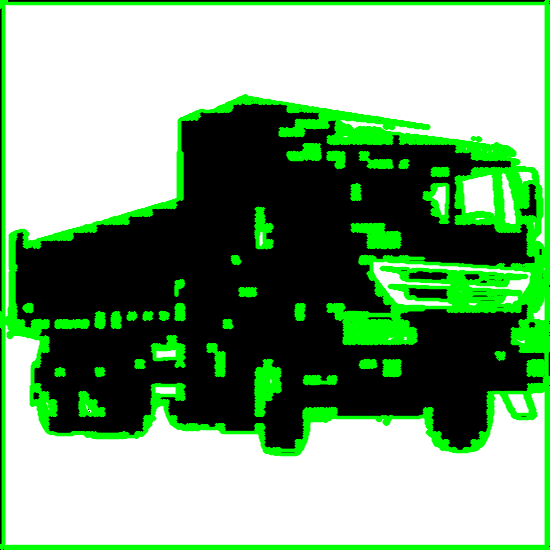

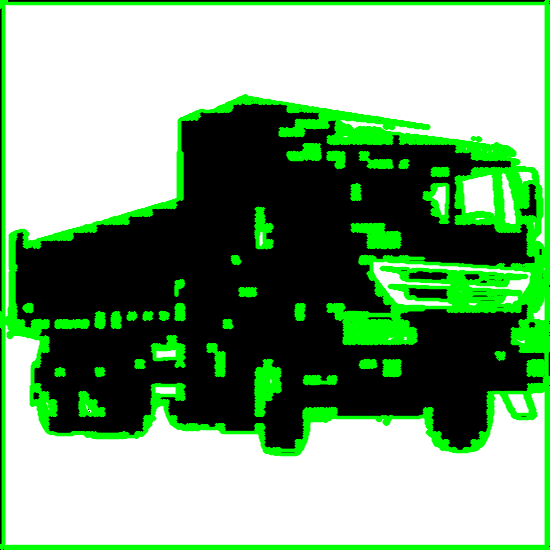

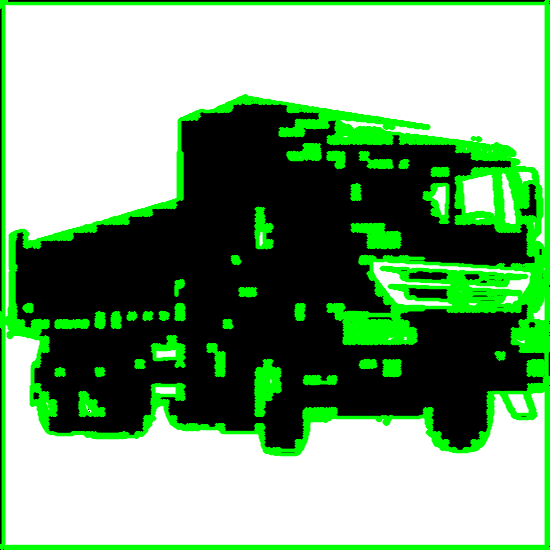

In [ ]:
import cv2

 

# read the image

image = cv2.imread('/content/drive/MyDrive/Images/Images/V6.jpg')

 

# B, G, R channel splitting

blue, green, red = cv2.split(image)

 

# detect contours using blue channel and without thresholding

contours1, hierarchy1 = cv2.findContours(image=blue, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

 

# draw contours on the original image

image_contour_blue = image.copy()

cv2.drawContours(image=image_contour_blue, contours=contours1, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

# see the results

cv2_imshow(image_contour_blue)

cv2.waitKey(0)

cv2.imwrite('Extracted.jpg', image_contour_blue)

cv2.destroyAllWindows()

 

# detect contours using green channel and without thresholding

contours2, hierarchy2 = cv2.findContours(image=green, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

# draw contours on the original image

image_contour_green = image.copy()

cv2.drawContours(image=image_contour_green, contours=contours2, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

# see the results

cv2_imshow(image_contour_green)

cv2.waitKey(0)

cv2.imwrite('Features.jpg', image_contour_green)

cv2.destroyAllWindows()

 

# detect contours using red channel and without thresholding

contours3, hierarchy3 = cv2.findContours(image=red, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

# draw contours on the original image

image_contour_red = image.copy()

cv2.drawContours(image=image_contour_red, contours=contours3, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

# see the results

cv2_imshow(image_contour_red)

cv2.waitKey(0)

cv2.imwrite('Outlined.jpg', image_contour_red)

cv2.destroyAllWindows()


In [ ]:
suppression_list = []
for s_row in range( len( sobel_g_angle_matrix)):
    for s_col in range(len( sobel_g_angle_matrix[s_row] ) ):
        if (s_row - 1)<0 or \
            (s_col-1)< 0 or \
            (s_row+1) > (len( sobel_g_angle_matrix )-1) or \
            (s_col+1) > (len( sobel_g_angle_matrix[s_row] )-1):
            suppression_list.append(0)
            continue
    
        magnitude_in_question = sobel_g_magnitude_matrix[s_row][s_col]
        #thresholding magnitude continue, arbitrary 129
        if magnitude_in_question < 36:
            suppression_list.append(0)
            continue    

        angle_in_question = sobel_g_angle_matrix[s_row][s_col]

        east_magnitude = sobel_g_magnitude_matrix[s_row][s_col-1]
        west_magnitude = sobel_g_magnitude_matrix[s_row][s_col+1]
        north_magnitude = sobel_g_magnitude_matrix[s_row-1][s_col]
        south_magnitude = sobel_g_magnitude_matrix[s_row+1][s_col]
        north_east_magnitude = sobel_g_magnitude_matrix[s_row-1][s_col-1]
        north_west_magnitude = sobel_g_magnitude_matrix[s_row-1][s_col+1]
        south_east_magnitude = sobel_g_magnitude_matrix[s_row+1][s_col-1]
        south_west_magnitude = sobel_g_magnitude_matrix[s_row+1][s_col+1]       
        if angle_in_question == 0 and magnitude_in_question > east_magnitude \
            and magnitude_in_question > west_magnitude:
            suppression_list.append(1)  
        elif angle_in_question == 90 and magnitude_in_question > north_magnitude \
            and magnitude_in_question > south_magnitude:
            suppression_list.append(1)  
        elif angle_in_question == 135 and magnitude_in_question > north_west_magnitude \
            and magnitude_in_question > south_east_magnitude:
            suppression_list.append(1)  
        elif angle_in_question == 45 and magnitude_in_question > north_east_magnitude \
            and magnitude_in_question > south_west_magnitude:
            suppression_list.append(1)  
        else:
            suppression_list.append(0)  
            

new_img = Image.new('1', (im_width,im_height)) #bw=1;grayscale =L
new_img.putdata( suppression_list )
new_img.save('Outline_Image.png', 'PNG')

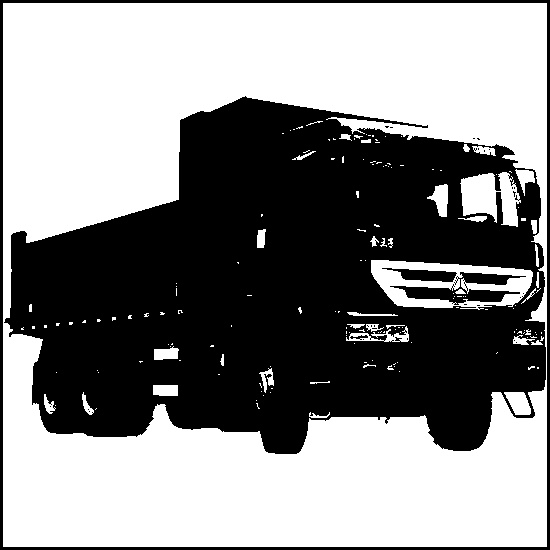

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Images/Images/V6.jpg")
cv2_imshow(img)

In [ ]:
end_time = time.time()
execution_time = (end_time - start_time)

print('The total execution time in seconds is %d' % execution_time)

The total execution time in seconds is 1388
